<a href="https://colab.research.google.com/github/mau-lozada/Clasificaci-nCrediticia_KNN/blob/main/Clasificaci%C3%B3n_Morosidad_crediticia_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificaci√≥n de Morosidad Crediticia con KNN üè¶

**Objetivo**: Predecir si un cliente pagar√° un cr√©dito (clase 1) o ser√° moroso (clase 0) usando el algoritmo K-Nearest Neighbors (KNN).

**Dataset**:
- `creditos.csv`: Contiene 200 registros con las columnas:
  - `edad`: Edad del cliente.
  - `credito`: Monto del cr√©dito otorgado.
  - `cumplio`: Variable binaria (1 = pag√≥, 0 = no pag√≥).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [6]:
clientes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditos.csv")
clientes.head(5)

edad  credito  cumplio
0    18   363112        0
1    19   477965        1
2    20   239072        0
3    22   195265        0
4    22   482174        0

**Exploraci√≥n inicial**:  
- Se cargaron 200 registros.
- Las primeras 5 filas muestran la estructura de los datos.

In [7]:
clientes.describe()

edad        credito     cumplio
count  200.000000     200.000000  200.000000
mean    37.280000  289946.670000    0.835000
std      9.148776  137945.585277    0.372112
min     18.000000  100000.000000    0.000000
25%     29.000000  172966.500000    1.000000
50%     37.500000  276234.000000    1.000000
75%     45.000000  394574.500000    1.000000
max     57.000000  596771.000000    1.000000

**Insights del Dataset**:  

- **Edad**:  
  - Rango: 18 a 57 a√±os.  
  - Media: 37.28 a√±os.  
  - 50% de los clientes tienen entre 29 y 45 a√±os.  

- **Monto de cr√©dito**:  
  - Rango: \$100,000 a \$596,771.  
  - Media: \$289,946.  
  - 50% de los cr√©ditos est√°n entre \$172,966 y \$394,574.  

- **Cumplimiento (target)**:  
  - **Clase 1 (Pag√≥)**: 83.5% (167 registros).  
  - **Clase 0 (No pag√≥)**: 16.5% (33 registros).  

**Observaci√≥n**: Hay un **desequilibrio de clases** (muchos m√°s clientes que pagaron). Esto podr√≠a afectar la m√©trica de precisi√≥n si no se maneja adecuadamente.  

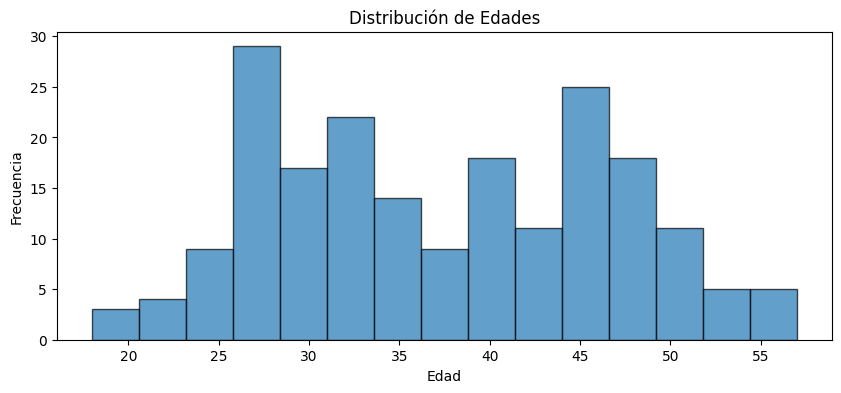

In [8]:
# Histograma de edades
plt.figure(figsize=(10, 4))
plt.hist(clientes["edad"], bins=15, edgecolor="black", alpha=0.7)
plt.title("Distribuci√≥n de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

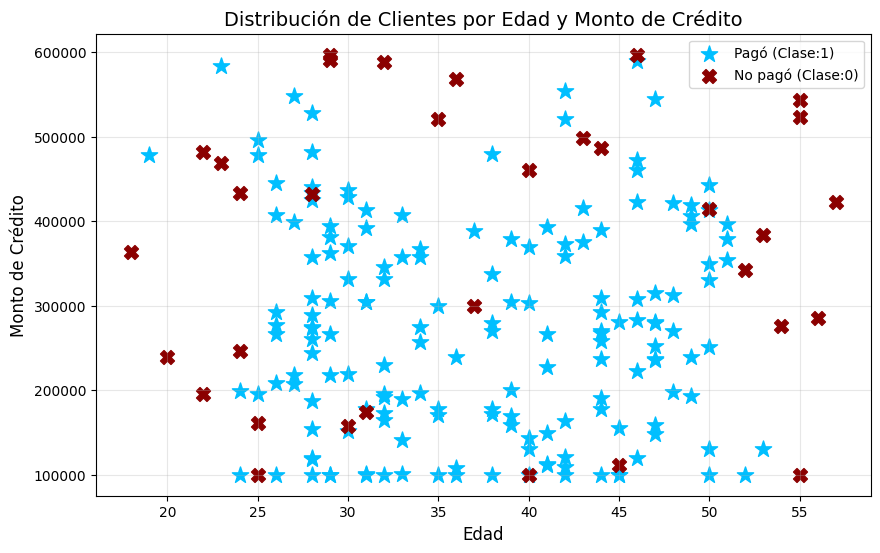

In [9]:
# Filtramos clientes por clase
clientes_buenos = clientes[clientes["cumplio"] == 1]
clientes_morosos = clientes[clientes["cumplio"] == 0]

# Creamos gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))
plt.scatter(clientes_buenos["edad"], clientes_buenos["credito"],
            marker="*", s=150, c="deepskyblue", label="Pag√≥ (Clase:1)")
plt.scatter(clientes_morosos["edad"], clientes_morosos["credito"],
            marker="X", s=100, c="darkred", label="No pag√≥ (Clase:0)")

plt.xlabel("Edad", fontsize=12)
plt.ylabel("Monto de Cr√©dito", fontsize=12)
plt.title("Distribuci√≥n de Clientes por Edad y Monto de Cr√©dito", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Visualizaci√≥n**:  
- Los clientes que **pagaron** (clase 1) se muestran con estrellas (*) azules.  
- Los clientes **morosos** (clase 0) se muestran con cruces (X) rojas.  
- Se observa que la mayor√≠a de los clientes han cumplido con el pago, mientras que los morosos est√°n distribuidos en diferentes rangos de edad y monto de cr√©dito.

Los clientes que no pagaron parecen concentrarse en montos m√°s altos de cr√©dito, pero no hay una correlaci√≥n clara con la edad.

## Preprocesamiento

In [14]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = clientes[["edad", "credito"]]  # Features
y = clientes["cumplio"]            # Target

escalador = preprocessing.MinMaxScaler()  # Escalador Min-Max (0-1)
X_escalado = escalador.fit_transform(X)   # Aplicar escalado a TODO el dataset

# Crear los folds estratificados (mantiene proporci√≥n de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### üîß **Validaci√≥n del Modelo**  
Debido al **tama√±o reducido del dataset (200 registros)** y el **desequilibrio de clases (83.5% vs 16.5%)**, se utiliz√≥ **validaci√≥n cruzada estratificada de 5 folds** para:  
1. Aprovechar al m√°ximo los datos disponibles.  
2. Garantizar que cada fold mantenga la proporci√≥n de clases.  
3. Obtener una estimaci√≥n robusta del rendimiento general del modelo.  

**Resultados**:  
- Precisi√≥n promedio: 85.00% (¬±5.50%).  

## Entenamiento

In [34]:
# Crear y entrenar clasificador KNN
clasificador_knn = KNeighborsClassifier(n_neighbors=3)

# Ejecutar validaci√≥n cruzada
scores = cross_val_score(
    clasificador_knn,
    X_escalado,
    y,
    cv=cv,  # cv ya definido en la celda 6
    scoring="accuracy"
)

# Resultados de validaci√≥n
print("Resultados de Validaci√≥n Cruzada:")
print(f"- Precisi√≥n promedio: {scores.mean():.2%}")
print(f"- Desviaci√≥n est√°ndar: ¬±{scores.std():.2%}")

Resultados de Validaci√≥n Cruzada:
- Precisi√≥n promedio: 84.50%
- Desviaci√≥n est√°ndar: ¬±2.92%


In [35]:
# Entrenamos con TODOS los datos para usar en producci√≥n
clasificador_knn.fit(X_escalado, y)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Opcional: Matriz de confusi√≥n en todo el dataset (cuidado con el overfitting)
y_pred = clasificador_knn.predict(X_escalado)
print("\n Matriz de Confusi√≥n (Datos Completos):")
print(confusion_matrix(y, y_pred))


 Matriz de Confusi√≥n (Datos Completos):
[[ 18  15]
 [  3 164]]


## üìå Interpretaci√≥n de Resultados  

### **Conclusiones Clave**:  
1. **Precisi√≥n General**: 84.5% (¬±2.92%), pero **no es la m√©trica m√°s confiable** debido al desbalanceo.  
2. **Clase Minoritaria (Morosos)**:  
   - El modelo solo detecta **54.5% de los morosos reales** (Recall bajo).  
   - Err√≥neamente clasifica **15 morosos** como cumplidores (riesgo financiero).  
3. **Clase Mayoritaria (Cumplidores)**:  
   - Detecta **98.2% de los cumplidores** (alto Recall).  
   - Solo **3 cumplidores** fueron erroneamente marcados como morosos (bajo riesgo comercial).  

### **Recomendaciones**:  
- **M√©tricas Adicionales**: Usar F1-Score o Matriz de Confusi√≥n estratificada para evaluar mejor el modelo.   

In [41]:
#Reporte de clasificaci√≥n
from sklearn.metrics import classification_report

# Predecir en todos los datos (solo para an√°lisis)
y_pred = clasificador_knn.predict(X_escalado)

print("Reporte de Clasificaci√≥n:")
print(classification_report(y, y_pred, target_names=["No pag√≥ (Clase 0)", "Pag√≥ (Clase 1)"]))

Reporte de Clasificaci√≥n:
                   precision    recall  f1-score   support

No pag√≥ (Clase 0)       0.86      0.55      0.67        33
   Pag√≥ (Clase 1)       0.92      0.98      0.95       167

         accuracy                           0.91       200
        macro avg       0.89      0.76      0.81       200
     weighted avg       0.91      0.91      0.90       200



## üìä Interpretaci√≥n de M√©tricas  

### **Clase Minoritaria (No pag√≥)**:  
- **Recall (55%)**: El modelo solo identifica **55% de los morosos reales**.  
  - Ejemplo: De 33 morosos, solo detect√≥ 18.  
- **F1-Score (67%)**: Indica un equilibrio sub√≥ptimo entre precisi√≥n y recall.  

### **Clase Mayoritaria (Pag√≥)**:  
- **Recall (98%)**: El modelo identifica **casi todos los cumplidores** (164/167).  
- **Precisi√≥n (92%)**: Alto porcentaje de aciertos cuando predice "Pag√≥".  

### **Conclusi√≥n**:  
El modelo est√° **sesgado hacia la clase mayoritaria** (cumplidores), lo que es riesgoso para un sistema crediticio.  

## Empezamos a hacer la predicci√≥n si otro cliente quisiera obtener un nuevo cr√©dito

In [50]:
#Ejemplo pr√°ctio
edad_nuevo = 35
monto_nuevo = 350000  # Monto en la misma unidad que el dataset original

# 1. Escalar los datos del nuevo cliente (usando el mismo escalador)
cliente_nuevo = np.array([[edad_nuevo, monto_nuevo]])  # Convertir a array 2D
cliente_nuevo_escalado = escalador.transform(cliente_nuevo)  # Escalar

# 2. Predecir clase y probabilidades
clase_predicha = clasificador_knn.predict(cliente_nuevo_escalado)
probabilidades = clasificador_knn.predict_proba(cliente_nuevo_escalado)

# 3. Mostrar resultados
print("\n" + "="*50)
print("üîç **Resultado de la Predicci√≥n:**")
print(f"- Edad del cliente: {edad_nuevo} a√±os")
print(f"- Monto solicitado: ${monto_nuevo:,.2f}")
print(f"- Clase predicha: {'‚úÖ PAGAR√Å (Clase 1)' if clase_predicha[0] == 1 else '‚ùå NO PAGAR√Å (Clase 0)'}")
print(f"- Probabilidad de no pago: {probabilidades[0][0]:.2%}")
print(f"- Probabilidad de pago: {probabilidades[0][1]:.2%}")
print("="*50 + "\n")


üîç **Resultado de la Predicci√≥n:**
- Edad del cliente: 35 a√±os
- Monto solicitado: $350,000.00
- Clase predicha: ‚úÖ PAGAR√Å (Clase 1)
- Probabilidad de no pago: 0.00%
- Probabilidad de pago: 100.00%



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


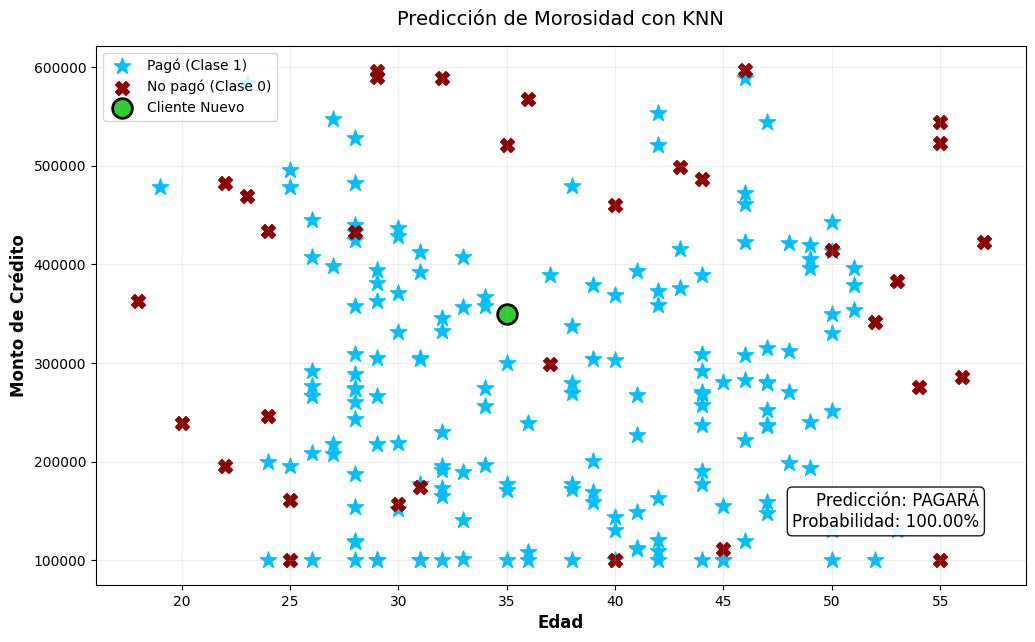

In [51]:
plt.figure(figsize=(12, 7))

# Graficar clientes existentes
plt.scatter(clientes_buenos["edad"], clientes_buenos["credito"],
            marker="*", s=150, c="deepskyblue", label="Pag√≥ (Clase 1)")
plt.scatter(clientes_morosos["edad"], clientes_morosos["credito"],
            marker="X", s=100, c="darkred", label="No pag√≥ (Clase 0)")

# Graficar nuevo cliente (usando datos originales)
plt.scatter(edad_nuevo, monto_nuevo,
            marker="o", s=200, c="limegreen", edgecolor="black",
            linewidth=2, label="Cliente Nuevo")

# A√±adir texto de predicci√≥n
texto_prediccion = f"Predicci√≥n: {'PAGAR√Å' if clase_predicha[0] == 1 else '‚ùå NO PAGAR√Å'}\nProbabilidad: {probabilidades[0][1]:.2%}"
plt.text(
    0.95,  # Posici√≥n X (95% del ancho del gr√°fico)
    0.10,  # Posici√≥n Y (10% del alto)
    texto_prediccion,
    transform=plt.gca().transAxes,  # Usar coordenadas relativas
    ha="right",  # Alineaci√≥n horizontal derecha
    va="bottom",  # Alineaci√≥n vertical inferior
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.9, edgecolor="black", boxstyle="round")
)

# Ajustes est√©ticos
plt.xlabel("Edad", fontsize=12, fontweight="bold")
plt.ylabel("Monto de Cr√©dito", fontsize=12, fontweight="bold")
plt.title("Predicci√≥n de Morosidad con KNN", fontsize=14, pad=15)
plt.grid(alpha=0.2)
plt.legend(loc="upper left")

plt.show()

## üìä Visualizaci√≥n del Nuevo Cliente  

**Interpretaci√≥n**:  
- El punto verde representa al cliente nuevo en el espacio original de features (edad y monto **sin escalar**).  
- Su posici√≥n relativa a los dem√°s clientes ayuda a entender por qu√© el modelo predijo "PAGAR√Å".  